In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [2]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(
        np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2
    )
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM berdasarkan kanal warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)

        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [3]:
# Memuat dan menormalisasi citra female.tiff
image_path = "dataset/female.tiff"
image = io.imread(image_path) / 255.0  # Normalisasi piksel ke rentang [0, 1]

In [4]:
# Parameter pelatihan SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5

# Melatih SOM dengan citra
trained_weights = train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius)

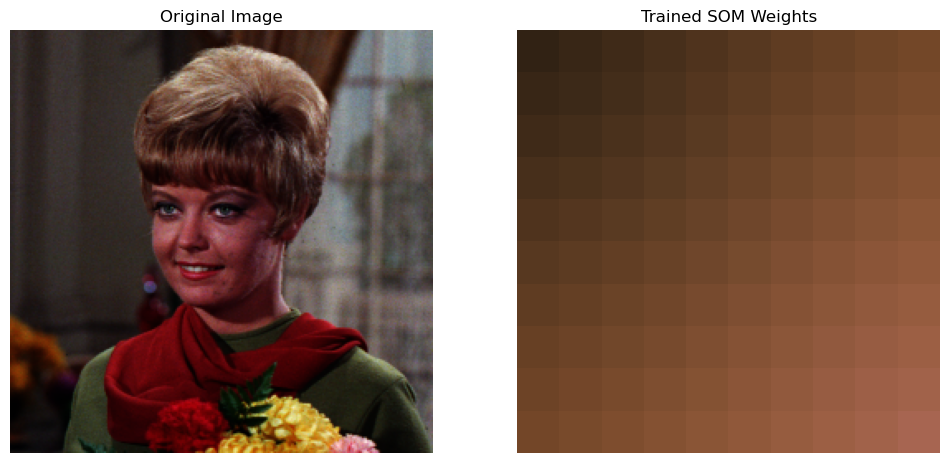

In [8]:
# Visualisasi Gambar Asli dan Bobot SOM
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Buat layout 1 baris, 2 kolom

# Tampilkan Gambar Asli
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')  # Hilangkan axis

# Tampilkan Bobot SOM
axes[1].imshow(trained_weights)
axes[1].set_title("Trained SOM Weights")
axes[1].axis('off')

# Tampilkan plot
plt.show()